In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['driver_imgs_list.csv', 'train', 'test', 'sample_submission.csv']


In [7]:
from glob import glob
import cv2 #이미지를 다루는 OpenCV library

import matplotlib.pyplot as plt

data_dir = '../input/'
train_path = data_dir + 'train/c0/'

In [6]:
def read_image(path) :
    #OpenCV는 이미지 데이터를 B, G, R 순서로 읽어옴
    #cv2.cvtColor() 함수를 이용해 R,G,B 순서로 변경
    
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [8]:
labels = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
col_to_kor = {
    'c0' : '안전 운전',
    'c1' : '오른손으로 문자',
    'c2' : '오른손으로 전화',
    'c3' : '왼손으로 문자',
    'c4' : '왼손으로 전화',
    'c5' : '라디오 조작',
    'c6' : '읍료수 섭취',
    'c7' : '뒷자석에 손 뻗기',
    'c8' : '얼굴, 머리 만지기',
    'c9' : '조수석과 대화'
}

# c0 outlier

c0 안전 운전 outlier


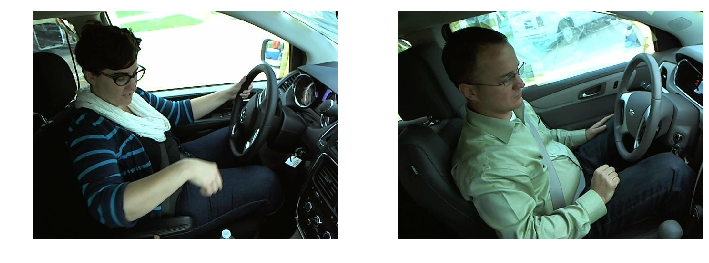

In [12]:
label = 'c0'
imgs = [21155, 31121]
print('c0 {} outlier'.format(col_to_kor[label]))

f, ax = plt.subplots(figsize = (12,10))
for x in range(len(imgs)) :
    plt.subplot(1,2,x+1)
    image = read_image('{}train/{}/img_{}.jpg'.format(data_dir, label, imgs[x]))
    plt.imshow(image)
    plt.axis('off')
plt.show()

# c3 outlier

c3 왼손으로 문자 outlier


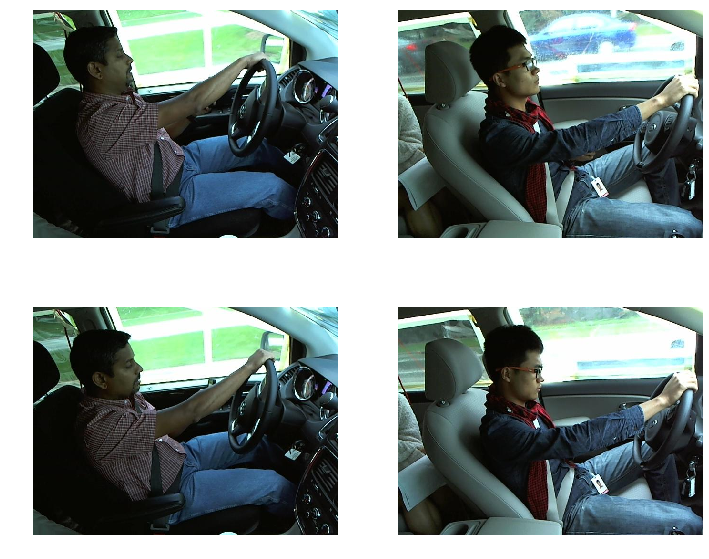

In [16]:
label = 'c3'
imgs = [38563,45874,49269,62784]
print('c3 {} outlier'.format(col_to_kor[label]))

f, ax = plt.subplots(figsize = (12,10))
for x in range(len(imgs)) :
    plt.subplot(2,2,x+1)
    image = read_image('{}train/{}/img_{}.jpg'.format(data_dir, label, imgs[x]))
    plt.imshow(image)
    plt.axis('off')
plt.show()

- 왼손으로 핸드폰을 들고 있긴 하나, 오른손에 가려져 잘 안 보임
- 시선이 정면을 향하고 있음

# c4 outlier

c4 왼손으로 전화 outlier


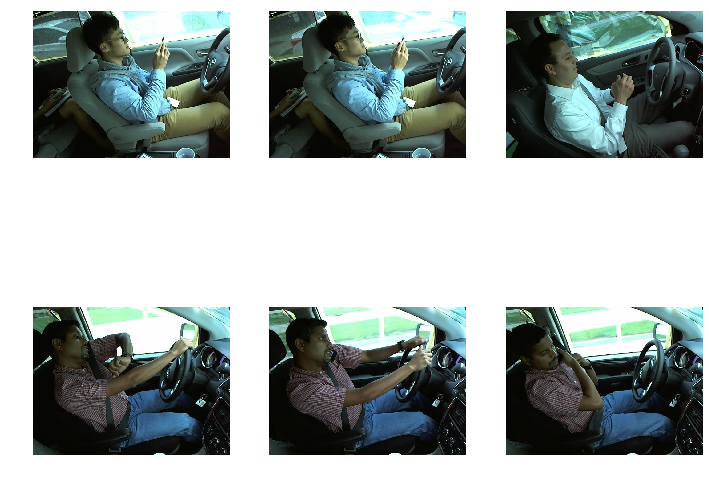

In [17]:
label = 'c4'
imgs = [92769, 38427, 41743, 69998, 77347, 16077]
print('c4 {} outlier'.format(col_to_kor[label]))

f, ax = plt.subplots(figsize = (12,10))
for x in range(len(imgs)) :
    plt.subplot(2,3,x+1)
    image = read_image('{}train/{}/img_{}.jpg'.format(data_dir, label, imgs[x]))
    plt.imshow(image)
    plt.axis('off')
plt.show()

- 운전자가 핸드폰을 양손으로 조작
- 전화도 아니고 문자를 하는 것으로 보임
- 특이한 자세로 전화

# c9 outlier

c9 조수석과 대화 outlier


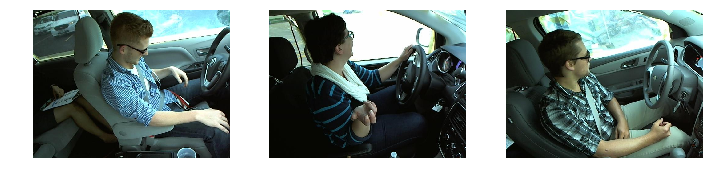

In [18]:
label = 'c9'
imgs = [28068, 37708, 73663]
print('c9 {} outlier'.format(col_to_kor[label]))

f, ax = plt.subplots(figsize = (12,10))
for x in range(len(imgs)) :
    plt.subplot(1,3,x+1)
    image = read_image('{}train/{}/img_{}.jpg'.format(data_dir, label, imgs[x]))
    plt.imshow(image)
    plt.axis('off')
plt.show()

- 조수석쪽을 보고 있지 않음

# wrong label

# Example of c0 : 안전운전 classified in wrong labels


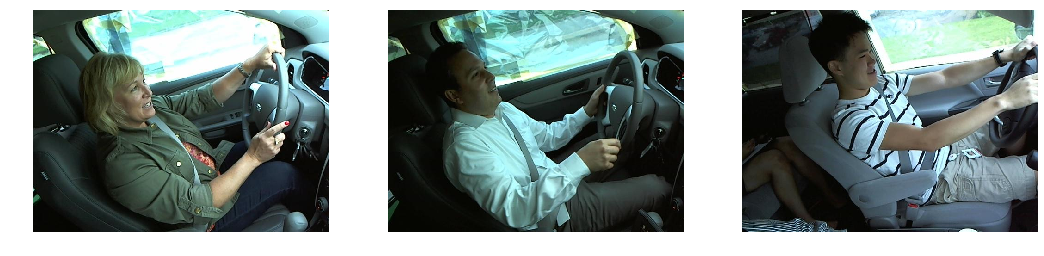

In [20]:
imgs = [('c5', 30288), ('c7', 46617), ('c8', 3835)]
f, ax = plt.subplots(figsize = (18,10))

print('# Example of c0 : 안전운전 classified in wrong labels')
for x in range(len(imgs)) :
    plt.subplot(1,3,x+1)
    image = read_image('{}train/{}/img_{}.jpg'.format(data_dir,imgs[x][0], imgs[x][1]))
    plt.imshow(image)
    plt.axis('off')
plt.show()

- c0에 포함되어야 할 것 같은데 다른 클래스로 분류되어 있다.

# Example of c1 : 안전운전 classified in wrong labels


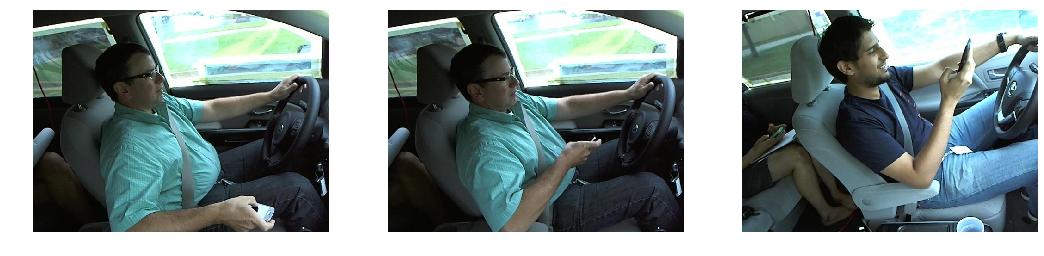

In [21]:
imgs = [('c0', 29923), ('c0', 79819), ('c2', 32934)]
f, ax = plt.subplots(figsize = (18,10))

print('# Example of c1 : 안전운전 classified in wrong labels')
for x in range(len(imgs)) :
    plt.subplot(1,3,x+1)
    image = read_image('{}train/{}/img_{}.jpg'.format(data_dir,imgs[x][0], imgs[x][1]))
    plt.imshow(image)
    plt.axis('off')
plt.show()

- c1에 포함되어야 할 것 같은데 다른 클래스로 분류되어 있다.

# Example of c1 : 안전운전 classified in wrong labels


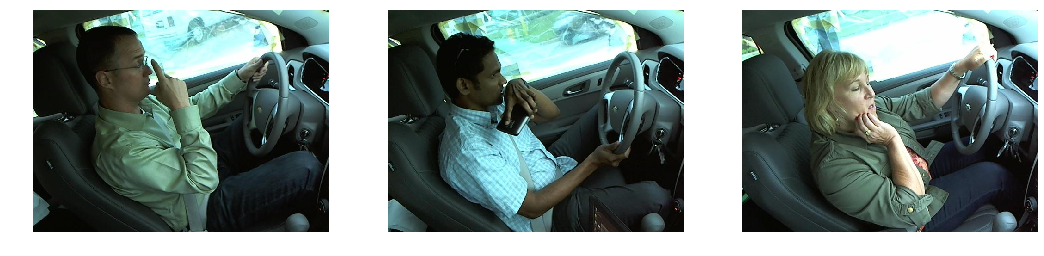

In [22]:
imgs = [('c0', 34380), ('c3', 423), ('c5', 78504)]
f, ax = plt.subplots(figsize = (18,10))

print('# Example of c1 : 안전운전 classified in wrong labels')
for x in range(len(imgs)) :
    plt.subplot(1,3,x+1)
    image = read_image('{}train/{}/img_{}.jpg'.format(data_dir,imgs[x][0], imgs[x][1]))
    plt.imshow(image)
    plt.axis('off')
plt.show()

- c8에 포함되어야 할 것 같은데 다른 클래스로 분류되어 있다.